# Project Capes: Writing Sequences

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-colorblind')

TypeError: list indices must be integers or slices, not list

In [2]:
Capes = pd.read_csv('CAPES_tidy.csv')
Capes = Capes.drop(columns=Capes.columns[0])
Capes

,Instructor,Course Name,Course Desc,Course Type,Term Type,Term Year,Enroll,Evals Made,Rcmnd Class,Rcmnd Instructor,Study Hrs/wk,Avg Letter Expected,Avg GPA Expected,Avg Letter Received,Avg GPA Received
0,"Kalleres, Dayna",RELI 1,Introduction to Religion (A),Lower Div,FA,22,37,11,0.909,1.000,2.50,B,3.20,A,4.00
1,"Rahimi, Babak",RELI 149,Islam in America (A),Lower Div,S1,22,40,5,1.000,1.000,3.70,A-,3.80,A-,3.98
2,"Rahimi, Babak",RELI 101,Tools&Methods/Studyof Religion (A),Lower Div,WI,22,39,10,0.900,0.900,3.61,B+,3.67,A-,3.73
3,"Rahimi, Babak",RELI 188,Special Topics in Religion (A),Lower Div,WI,22,34,11,0.800,0.900,3.90,A-,3.90,A-,3.81
4,"Kalleres, Dayna",RELI 1,Introduction to Religion (A),Lower Div,FA,21,37,18,0.813,0.750,2.50,A-,3.85,A-,3.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59363,"Gladstein, Jill M",SYN 1,Perspectives/Changing Planet (0),Lower Div,WI,22,404,243,0.909,0.934,3.95,A-,3.94,A-,3.90
59364,"Gladstein, Jill M",SYN 2,Explorations/Changing Planet (0),Lower Div,WI,22,191,93,0.770,0.885,4.18,A-,3.79,A-,3.89
59365,"Gladstein, Jill M",SYN 2,Explorations/Changing Planet (0),Lower Div,FA,21,319,135,0.680,0.744,3.89,A-,3.93,A-,3.88
59366,"Gladstein, Jill M",SYN 1,Perspectives/Changing Planet (0),Lower Div,SP,21,235,107,0.906,0.953,5.15,A-,3.85,A-,3.88


## Part 1: Data Filtering

Each of the UCSD undergraduate colleges offer a unique writing sequence. Here, we show the writing GEs for First Year students, ignoring the alternative sequence(s) for Transfer students.

| College Name | Writing Requirement |
| ------------ | ------------------- |
| Revelle | HUM 1, HUM 2, HUM 3/3GS, HUM 4/4GS, HUM 5 |
| Muir | MCWP 40, MCWP 50 |
| Marshall | DOC 1, DOC 2, DOC 3 |
| Warren | WCWP 10A, WCWP 10B |
| Roosevelt | MMW 11, MMW 12, MMW 13, MMW 14, MMW 15 |
| Sixth | CAT 1, CAT 2, CAT 3, CAT 125/125R |
| Seventh | SYN 1, SYN 2, SYN 3 |
| Eighth | N/A |

We also ignore that some colleges allow students to take additional writing classes to fulfill General Education requirements. We will focus only on each college's unique, required writing sequence.

When we generate DataFrames for all the college's writing programs, we run into all sorts of problems:

In [3]:
# NOTE: Revelle's HUM 119 is deprecated, so we remove it.
Revelle_writ = Capes[Capes.get('Course Name').str.contains('HUM')]
Revelle_writ = Revelle_writ[-Revelle_writ.get('Course Name').str.contains('HUM 119')]
Revelle_writ.get('Course Name').unique()

array(['HUM 3', 'HUM 4', 'HUM 5', 'HUM 3GS', 'HUM 4GS', 'HUM 2', 'HUM 1'],
      dtype=object)

In [4]:
# NOTE: Muir's writing sequence is NOT on CAPES.
Muir_writ = Capes[Capes.get('Course Name').str.contains('MCWP')]
Muir_writ.get('Course Name').unique()

array([], dtype=object)

In [5]:
# NOTE: DOC 100/100D are DEI for all colleges, not GE, so we remove them.
Marshall_writ = Capes[Capes.get('Course Name').str.contains('DOC')]
Marshall_writ = Marshall_writ[-Marshall_writ.get('Course Name').str.contains('DOC 100')]
Marshall_writ.get('Course Name').unique()

array(['DOC 1', 'DOC 3', 'DOC 2'], dtype=object)

In [6]:
# NOTE: WCWP 100 is for transfer, and WCWP is for all colleges, so we remove them.
Warren_writ = Capes[Capes.get('Course Name').str.contains('WCWP')]
Warren_writ = Warren_writ[-Warren_writ.get('Course Name').str.contains('WCWP 100')]
Warren_writ = Warren_writ[-Warren_writ.get('Course Name').str.contains('WCWP 160')]
Warren_writ.get('Course Name').unique()

array(['WCWP 10A', 'WCWP 10B'], dtype=object)

In [7]:
# NOTE: MMW 1-6 is the deprecated sequence during 1988-2010, so we remove them.
# NOTE: MMW 121-122 is the transfer student sequence, so we remove them.
Roosevelt_writ = Capes[Capes.get('Course Name').str.contains('MMW')]
Roosevelt_writ = Roosevelt_writ[
    (Roosevelt_writ.get('Course Name') == 'MMW 11') | 
    (Roosevelt_writ.get('Course Name') == 'MMW 12') | 
    (Roosevelt_writ.get('Course Name') == 'MMW 13') | 
    (Roosevelt_writ.get('Course Name') == 'MMW 14') | 
    (Roosevelt_writ.get('Course Name') == 'MMW 15')
]
Roosevelt_writ.get('Course Name').unique()

array(['MMW 11', 'MMW 14', 'MMW 12', 'MMW 13', 'MMW 15'], dtype=object)

In [8]:
# NOTE: CAT 75, 87, 124, 192 are seminars, so we remove them.
Sixth_writ = Capes[Capes.get('Course Name').str.contains('CAT')]
Sixth_writ = Sixth_writ[-(
    (Sixth_writ.get('Course Name') == 'CAT 87') |
    (Sixth_writ.get('Course Name') == 'CAT 75') |
    (Sixth_writ.get('Course Name').str.contains('CAT 124')) |
    (Sixth_writ.get('Course Name') == 'CAT 192')
)]
Sixth_writ.get('Course Name').unique()

array(['CAT 1', 'CAT 125R', 'CAT 3', 'CAT 125GS', 'CAT 2', 'CAT 125'],
      dtype=object)

In [9]:
# NOTE: Due to Seventh's young age there are very few CAPE entries here.
Seventh_writ = Capes[Capes.get('Course Name').str.contains('SYN')]
Seventh_writ.get('Course Name').unique()

array(['SYN 100', 'SYN 2', 'SYN 1'], dtype=object)

### Part 1 Conclusions
Due to the complexity and difference between one college's writing sequence with the other, clearly it will be difficult, if not impossible, to compare these wrting sequences with each other. 

## Part 2: Per College Analysis

However, we can still analyse each writing sequence as a standalone DataFrame. Here, we will create generic functions to create visualizations of any college's writing sequence.

## Part 3: Revelle vs. MMW

Amongst students, Revelle and MMW's are consistently ranked as the most difficult writing sequences. As both are the only colleges that require 5 class writing sequences, we can easily see why this is the case.  

Here, we will attempt to more specifically compare Revelle and MMW's writing sequences. Note the following potential sources of biases:
 - Revelle's HUM 1-5 sequence has been running for a long time. ERC however introduced a new MMW 11-15 sequence in 2010, to replace MMW 1-5.
 - Revelle's sequence focuses on the development of Western Civilization, while ERC's sequence takes a more modern and international perspective.
 - Revelle's HUM 1-2 are 6 units and HUM 3-5 4 units, while ERC's MMW 11 is 4 units, MMW 12-13 6 units, and MMW 14-15 4 units.
 - Revelle requires ELWR prior to starting HUM in the Winter. ERC allows all students (regardless of ELWR) to enter MMW 11 in the Fall.

In [11]:
Capes_HUM = Capes[Capes.get('Course Name').str.contains('HUM')]
Capes_HUM.groupby('Instructor').mean()\
    .sort_values(by='Avg GPA Received',ascending=False)\
    .head(10)

/var/folders/bw/l5fz946x5m75fnhws84c85kh0000gn/T/ipykernel_96319/39374805.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Capes_HUM.groupby('Instructor').mean()\


,Term Year,Enroll,Evals Made,Rcmnd Class,Rcmnd Instructor,Study Hrs/wk,Avg GPA Expected,Avg GPA Received
Instructor,,,,,,,,
"Tronzo, William",20.500000,27.750000,11.000000,1.000000,1.000000,3.612500,3.895000,3.985000
"Jed, Stephanie H",14.000000,22.500000,12.250000,1.000000,1.000000,7.275000,3.980000,3.980000
"Herbst, Matthew",18.000000,28.000000,23.000000,1.000000,1.000000,8.410000,3.680000,3.600000
"Parrish, Michael E.",17.000000,23.000000,9.800000,1.000000,0.866800,8.490000,3.446000,3.462500
"Hall, Matthew Aaron",22.000000,29.000000,14.000000,0.769000,0.769000,10.350000,3.310000,3.370000
"Lundell, Michael J",12.500000,24.000000,15.500000,0.940000,0.980000,7.940000,3.265000,3.310000
"Patterson, Patrick H.",19.538462,104.692308,69.461538,0.754615,0.932308,7.325385,3.180000,3.211667
"Markman, Kristina",20.235294,210.705882,175.176471,0.704353,0.950706,6.980588,3.084118,3.140000
"Lee, John Hoon",13.750000,173.500000,120.125000,0.798083,0.958917,6.380833,3.082500,3.099583


In [12]:
Capes_HUM.groupby('Course Name').mean().drop(['HUM 119','HUM 3GS','HUM 4GS'])

/var/folders/bw/l5fz946x5m75fnhws84c85kh0000gn/T/ipykernel_96319/449724091.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Capes_HUM.groupby('Course Name').mean().drop(['HUM 119','HUM 3GS','HUM 4GS'])


,Term Year,Enroll,Evals Made,Rcmnd Class,Rcmnd Instructor,Study Hrs/wk,Avg GPA Expected,Avg GPA Received
Course Name,,,,,,,,
HUM 1,16.062500,200.953125,150.296875,0.703063,0.892375,6.966875,2.983281,2.925625
HUM 2,15.516667,209.400000,123.066667,0.680067,0.875083,6.490167,3.043667,2.953000
HUM 3,15.518519,127.506173,90.432099,0.759259,0.934901,6.691481,3.087160,3.006667
HUM 4,16.028571,101.614286,60.928571,0.768971,0.918329,6.572857,3.033857,2.911385
HUM 5,15.808219,110.027397,64.726027,0.799466,0.937575,6.547397,3.067671,2.961385


/var/folders/bw/l5fz946x5m75fnhws84c85kh0000gn/T/ipykernel_96319/926151706.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Capes_HUM.groupby('Term Year').mean().get('Enroll').plot(kind='line')


<AxesSubplot: xlabel='Term Year'>

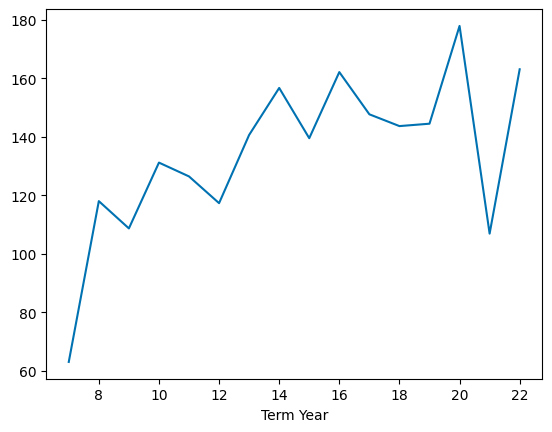

In [13]:
Capes_HUM.groupby('Term Year').mean().get('Enroll').plot(kind='line')

/var/folders/bw/l5fz946x5m75fnhws84c85kh0000gn/T/ipykernel_96319/1057058900.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Capes_HUM2 = Capes[Capes.get('Course Name').str.contains('HUM 2')].groupby('Instructor').mean()\


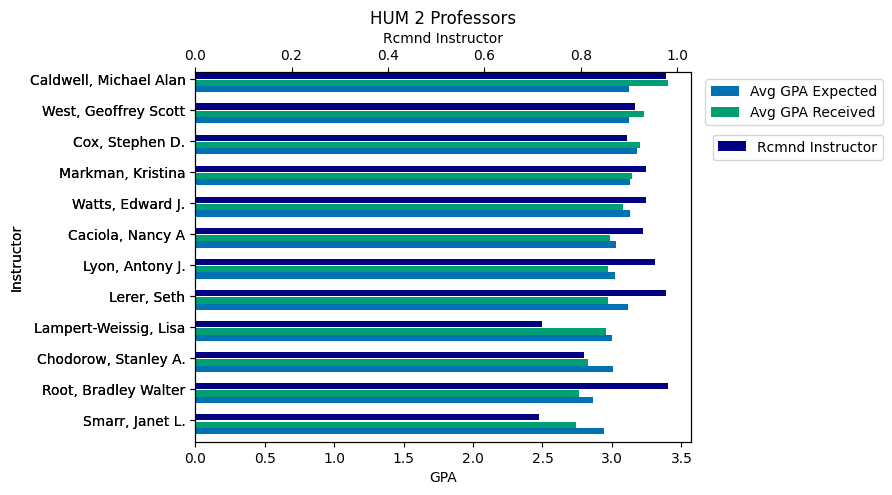

In [14]:
Capes_HUM2 = Capes[Capes.get('Course Name').str.contains('HUM 2')].groupby('Instructor').mean()\
    .reset_index().sort_values(by='Avg GPA Received')

fig = plt.figure()
ax1 = fig.add_subplot()
ax2 = ax1.twiny()

Capes_HUM2.plot(
    kind = 'barh',
    x = 'Instructor',
    y = 'Rcmnd Instructor',
    color = 'navy',
    ax = ax2,
    position = 0,
    width = 0.2
)

Capes_HUM2.plot(
    kind = 'barh',
    x = 'Instructor',
    y = ['Avg GPA Expected','Avg GPA Received'],
    ax = ax1,
    position = 1.1,
    width = 0.4
)

ax1.set_xlabel('GPA')
ax2.set_xlabel('Rcmnd Instructor')
plt.title('HUM 2 Professors')

ax1.legend(loc='upper right', bbox_to_anchor = (1.4,1))
ax2.legend(loc='upper right', bbox_to_anchor = (1.4,0.85))

plt.savefig('HUM2Prof',dpi=600, bbox_inches='tight')